In [ ]:
pip install pandas numpy scikit-learn tensorflow


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
train_directory = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/train'
val_directory = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test'
files = os.listdir(train_directory)
filess = os.listdir(val_directory)
print(files)
print(filess)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['happy', 'nothing', 'sad', 'angry']
['sad', 'nothing', 'angry', 'happy']


In [ ]:
import chardet

def read_file_safely(file_path):
    with open(file_path, 'rb') as f:
        raw_data = f.read()
        result = chardet.detect(raw_data)
        encoding = result['encoding']

    with open(file_path, 'r', encoding=encoding, errors='ignore') as f:
        return f.read().strip()

def load_data_from_folder(folder_path):
    texts = []
    labels = []

    for label in os.listdir(folder_path):
        label_folder = os.path.join(folder_path, label)
        if os.path.isdir(label_folder):
            for file in os.listdir(label_folder):
                file_path = os.path.join(label_folder, file)
                try:
                    text = read_file_safely(file_path)
                    texts.append(text)
                    labels.append(label)
                except Exception as e:
                    print(f"Skipping file {file_path} due to error: {e}")

    return texts, labels

test_folder = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/train'
val_folder = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test'
texts, labels = load_data_from_folder(test_folder)


In [ ]:
CONFIG = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 128,
    "LEARNING_RATE": 1e-3,
    "N_EPOCHS": 5,
    "DROPOUT_RATE": 0.3,
    "REGULARIZATION_RATE": 0.001,
    "NUM_CLASSES": 3,
    "CLASS_NAMES": ["angry", "happy","nothing", "sad"]
}


In [ ]:
import tensorflow as tf
train_df = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='int',
    class_names=CONFIG["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIG["BATCH_SIZE"],
    image_size=(CONFIG["IM_SIZE"], CONFIG["IM_SIZE"]),
    shuffle=True,
    seed=42
)
val_df = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='int',
    class_names=CONFIG["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIG["BATCH_SIZE"],
    image_size=(CONFIG["IM_SIZE"], CONFIG["IM_SIZE"]),
    shuffle=True,
    seed=42
)


Found 3152 files belonging to 4 classes.
Found 788 files belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers import Resizing, Rescaling
resize_rescale_layers = tf.keras.Sequential([
    Resizing(CONFIG['IM_SIZE'], CONFIG['IM_SIZE']),
    Rescaling(1./255)
])
train_df = train_df.map(lambda x, y: (resize_rescale_layers(x), y), num_parallel_calls=tf.data.AUTOTUNE)
train_df = train_df.prefetch(buffer_size=tf.data.AUTOTUNE)
val_df = val_df.map(lambda x, y: (resize_rescale_layers(x), y), num_parallel_calls=tf.data.AUTOTUNE)
val_df = val_df.prefetch(buffer_size=tf.data.AUTOTUNE)

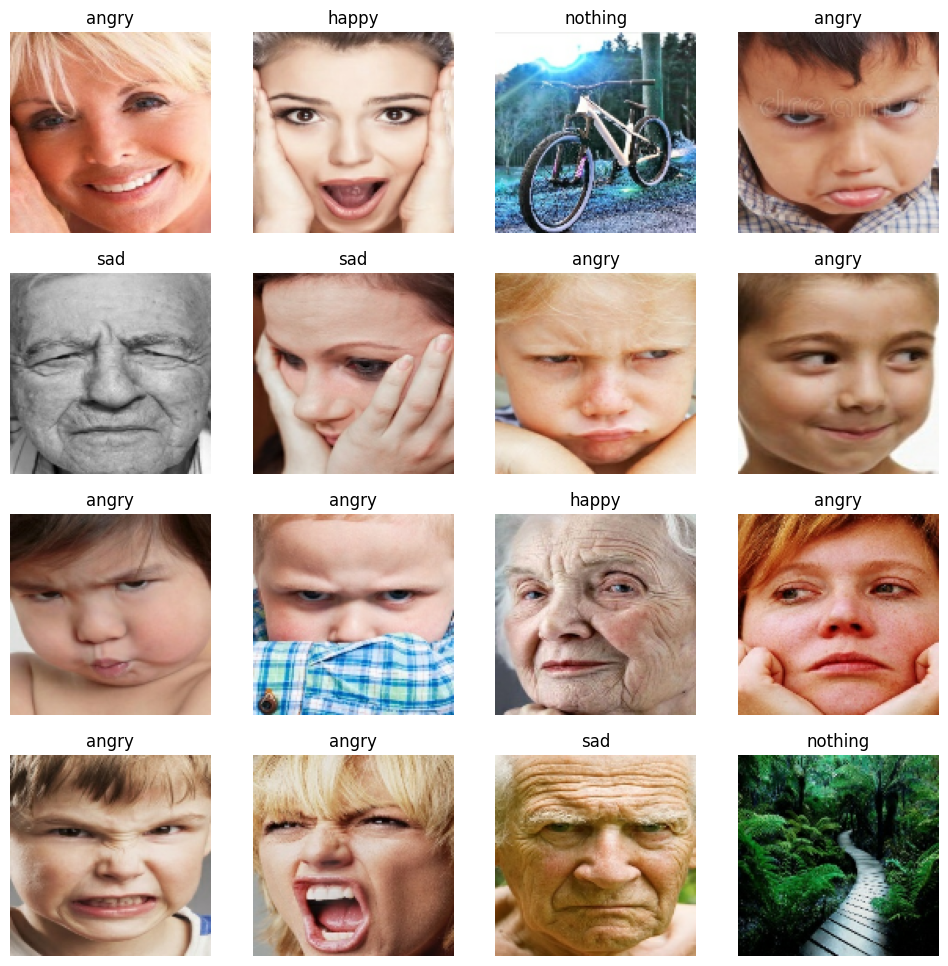

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for images, labels in train_df.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(CONFIG["CLASS_NAMES"][labels[i].numpy()])
        plt.axis("off")
plt.show()


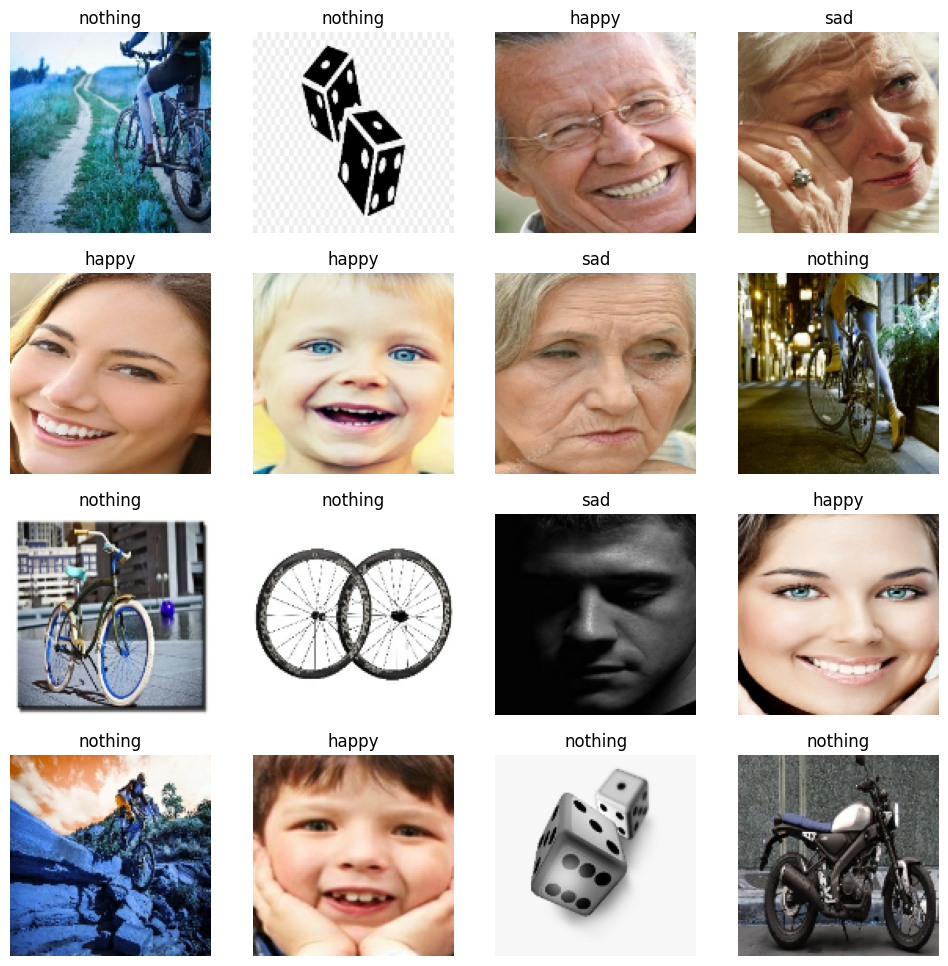

In [ ]:
plt. figure(figsize = (12,12))
for images, labels in val_df. take (1) :
    for i in range (16):
        ax = plt.subplot(4,4, i+1)
        plt. imshow(images [i].numpy())
        plt.title(CONFIG["CLASS_NAMES"][labels[i]])

        plt.axis ("off")

In [ ]:
for i in train_df. take (1) :
    print(i)

(<tf.Tensor: shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[0.8027574 , 0.7419731 , 0.64589465],
         [0.84810054, 0.75698537, 0.6912378 ],
         [0.8382353 , 0.7372549 , 0.6942402 ],
         ...,
         [0.6166667 , 0.495527  , 0.42610297],
         [0.49613973, 0.38186276, 0.3193015 ],
         [0.50330883, 0.39632356, 0.33020836]],

        [[0.8318628 , 0.7549633 , 0.67193633],
         [0.8583334 , 0.77524513, 0.71133584],
         [0.85104173, 0.77352947, 0.72806376],
         ...,
         [0.5137255 , 0.39129904, 0.314277  ],
         [0.571201  , 0.45563728, 0.38504905],
         [0.48002455, 0.36574757, 0.3031863 ]],

        [[0.8593138 , 0.75453436, 0.69638485],
         [0.79828435, 0.72377455, 0.6654412 ],
         [0.8000001 , 0.74908096, 0.69417894],
         ...,
         [0.6402574 , 0.51096815, 0.43651962],
         [0.53860295, 0.4161765 , 0.33915442],
         [0.59926474, 0.47812504, 0.408701  ]],

        ...,

        [[0.73192406, 0.6034927 

In [ ]:
for i in val_df. take (1) :
    print(i)

(<tf.Tensor: shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[2.90931404e-01, 2.98774540e-01, 2.94852972e-01],
         [2.90502459e-01, 2.98345596e-01, 2.94424027e-01],
         [2.65625030e-01, 2.73468167e-01, 2.69546598e-01],
         ...,
         [4.85906899e-02, 4.90808859e-02, 3.97671610e-02],
         [1.17034316e-02, 1.56250000e-02, 2.45098048e-03],
         [2.34068632e-02, 2.73284335e-02, 9.19117685e-03]],

        [[2.60661781e-01, 2.68504918e-01, 2.64583349e-01],
         [2.25735307e-01, 2.33578444e-01, 2.29656875e-01],
         [2.08149523e-01, 2.15992659e-01, 2.12071091e-01],
         ...,
         [2.36519631e-02, 2.41421591e-02, 1.48284324e-02],
         [3.26593146e-02, 3.65808830e-02, 1.69730410e-02],
         [1.27450991e-02, 1.66666675e-02, 3.49264732e-03]],

        [[2.34497562e-01, 2.42340699e-01, 2.38419130e-01],
         [1.81985304e-01, 1.89828441e-01, 1.85906872e-01],
         [2.09436283e-01, 2.17279419e-01, 2.13357851e-01],
         ...,
         

# CNN MODEL


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
CONFIG = {
    'IM_SIZE': 128,
    'DROPOUT_RATE': 0.5,
    'NUM_CLASSES': 4,
    'LEARNING_RATE': 0.001,
    'N_EPOCHS': 20

}
def create_cnn_model():
    model = Sequential([
        Input(shape=(CONFIG['IM_SIZE'], CONFIG['IM_SIZE'], 3)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(CONFIG['DROPOUT_RATE']),
        Dense(CONFIG['NUM_CLASSES'], activation='softmax')
    ])
    return model
cnn_model = create_cnn_model()
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIG['LEARNING_RATE']),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,196 (16.36 MB)

 Trainable params: 4,288,196 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
metrics = [
    tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.SparseTopKCategoricalAccuracy(k=2, name='top_k_accuracy')
]
loss_function = SparseCategoricalCrossentropy()
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIG['LEARNING_RATE']),
    loss=loss_function,
    metrics=metrics
)
history_cnn = cnn_model.fit(
    train_df,
    validation_data=val_df,  # <-- Add this line
    epochs=CONFIG['N_EPOCHS'],
    verbose=1
)



Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.5229 - loss: 0.9809 - top_k_accuracy: 0.7895 - val_accuracy: 0.5901 - val_loss: 0.7801 - val_top_k_accuracy: 0.8338
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5915 - loss: 0.8344 - top_k_accuracy: 0.8109 - val_accuracy: 0.6561 - val_loss: 0.7210 - val_top_k_accuracy: 0.8807
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.6366 - loss: 0.7733 - top_k_accuracy: 0.8444 - val_accuracy: 0.7043 - val_loss: 0.7046 - val_top_k_accuracy: 0.8858
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.6725 - loss: 0.7274 - top_k_accuracy: 0.8738 - val_accuracy: 0.7145 - val_loss: 0.6669 - val_top_k_accuracy: 0.8947
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7054 - loss: 0.6523 - top_k_accuracy: 0.8887 - val_accuracy: 0.6777 - val_loss: 0.6480 - val_top_k_accuracy: 0.8731
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7152 - loss: 0.6217 - top_k_ac

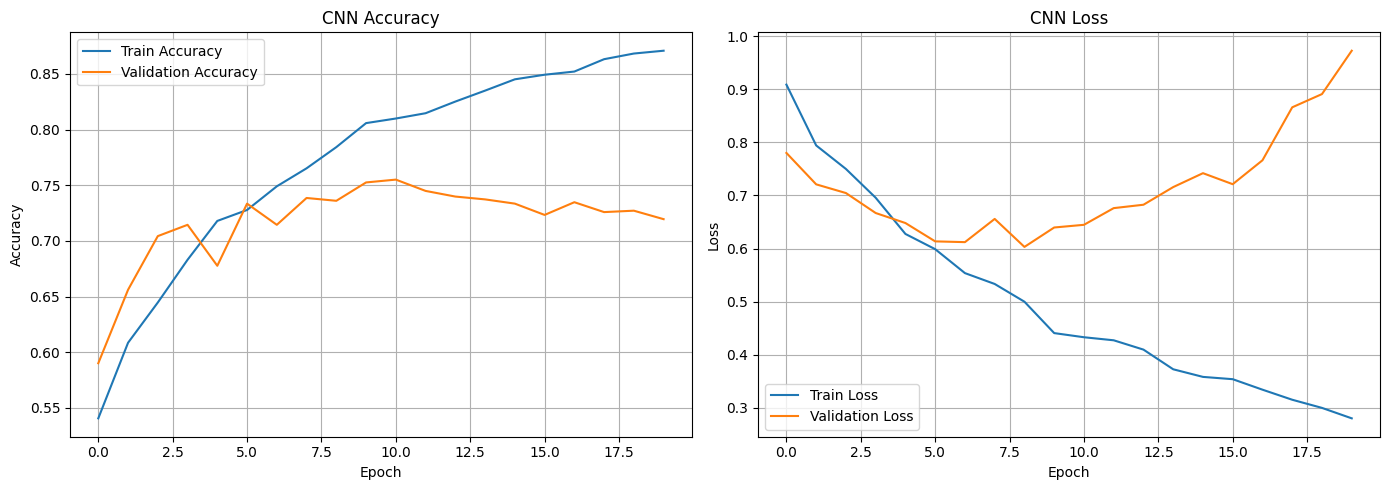

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Found 788 files belonging to 4 classes.


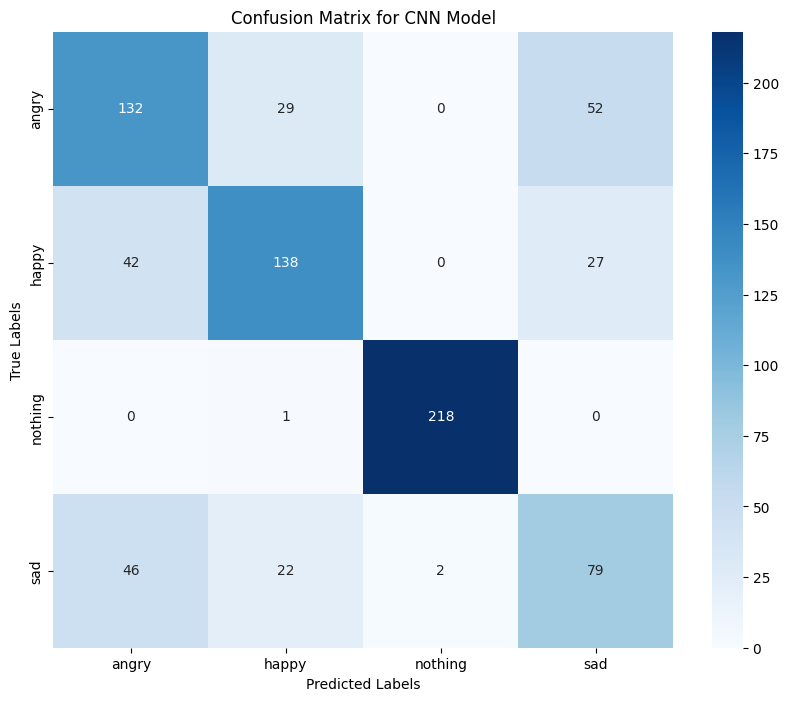

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
test_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test',
    image_size=(CONFIG['IM_SIZE'], CONFIG['IM_SIZE']),
    batch_size=32
)
CONFIG['CLASS_NAMES'] = test_dataset.class_names
CNN_INPUT_SIZE = cnn_model.input_shape[1:3]
true_labels = []
predicted_labels = []
for images, labels in test_dataset:
    images = images / 255.0
    preds = cnn_model(images, training=False)
    pred_label_idx = tf.argmax(preds, axis=1).numpy()
    true_labels.extend(labels.numpy())
    predicted_labels.extend(pred_label_idx)
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CONFIG['CLASS_NAMES'], yticklabels=CONFIG['CLASS_NAMES'])
plt.title("Confusion Matrix for CNN Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
cnn_eval_results = cnn_model.evaluate(train_df, verbose=1)
print(f"\nCNN Model Evaluation Results:\nLoss: {cnn_eval_results[0]:.4f}, Accuracy: {cnn_eval_results[1]:.4f}, Top-2 Accuracy: {cnn_eval_results[2]:.4f}")


99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step - accuracy: 0.8923 - loss: 0.2297 - top_k_accuracy: 0.9782

CNN Model Evaluation Results:
Loss: 0.1984, Accuracy: 0.9131, Top-2 Accuracy: 0.9832


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


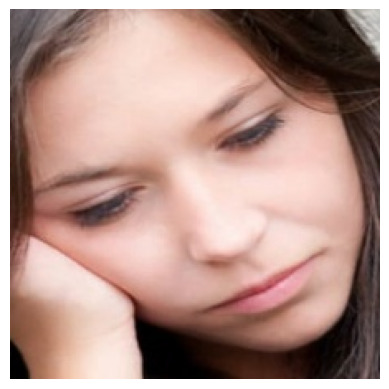

Predicted class: 1


In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test/sad/sad_140.jpg'
test_image = cv2.imread(img_path)

if test_image is None:
    print("Image not found or failed to load:", img_path)
else:
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    test_image_resized = cv2.resize(test_image, (CONFIG['IM_SIZE'], CONFIG['IM_SIZE']))
    test_image_resized = test_image_resized.astype('float32') / 255.0
    test_image_resized = np.expand_dims(test_image_resized, axis=0)
    prediction = cnn_model.predict(test_image_resized)
    predicted_class = np.argmax(prediction, axis=1)
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()
    print(f"Predicted class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


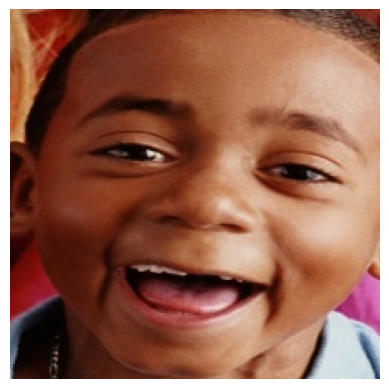

Predicted class: 1


In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test/happy/happy_140.jpg'
test_image = cv2.imread(img_path)

if test_image is None:
    print("Image not found or failed to load:", img_path)
else:
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    test_image_resized = cv2.resize(test_image, (CONFIG['IM_SIZE'], CONFIG['IM_SIZE']))
    test_image_resized = test_image_resized.astype('float32') / 255.0
    test_image_resized = np.expand_dims(test_image_resized, axis=0)
    prediction = cnn_model.predict(test_image_resized)
    predicted_class = np.argmax(prediction, axis=1)
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()
    print(f"Predicted class: {predicted_class[0]}")


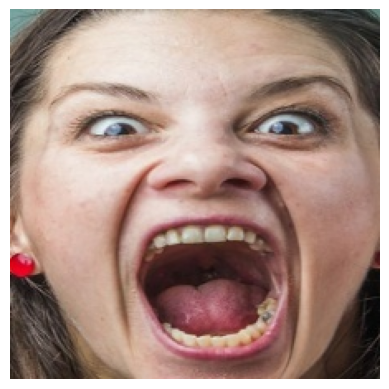

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test/angry/angry_140.jpg'
test_image = cv2.imread(img_path)

if test_image is None:
    print("Image not found or failed to load:", img_path)
else:
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()


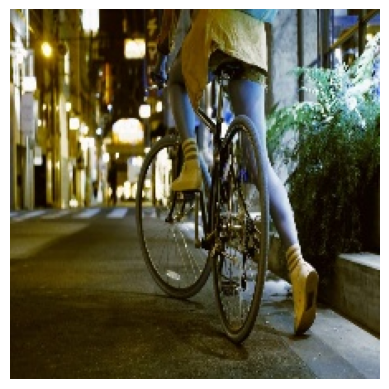

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test/nothing/nothing_140.jpg'
test_image = cv2.imread(img_path)

if test_image is None:
    print("Image not found or failed to load:", img_path)
else:
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()


In [ ]:
CONFIG = {
    'IM_SIZE': 128,
    'DROPOUT_RATE': 0.5,
    'NUM_CLASSES': 4,
    'LEARNING_RATE': 0.001,
    'N_EPOCHS': 10,
    'CLASS_NAMES': ['sad', 'happy', 'angry','nothing']
}


Found 788 files belonging to 4 classes.
CNN Model expects input shape: (128, 128)


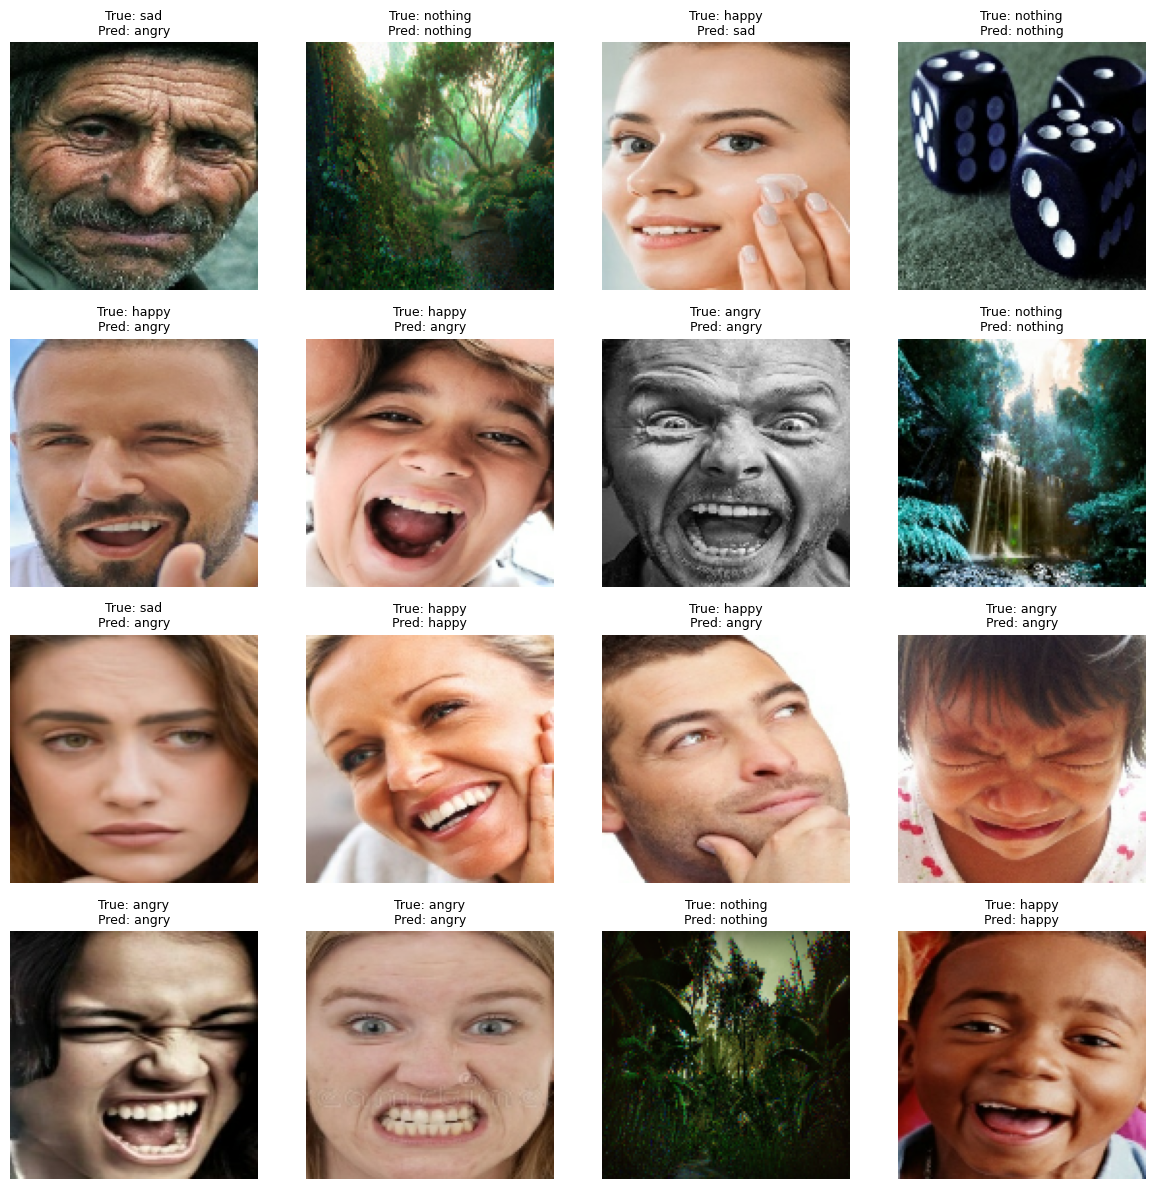

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test',
    image_size=(CONFIG['IM_SIZE'], CONFIG['IM_SIZE']),
    batch_size=32
)

CONFIG['CLASS_NAMES'] = train_dataset.class_names
CNN_INPUT_SIZE = cnn_model.input_shape[1:3]
print("CNN Model expects input shape:", CNN_INPUT_SIZE)

plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    images = images / 255.0
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)

        img = tf.image.resize(images[i], CNN_INPUT_SIZE)
        img_expanded = tf.expand_dims(img, axis=0)
        preds = cnn_model(img_expanded, training=False)
        pred_label_idx = tf.argmax(preds, axis=1).numpy()[0]
        pred_label = CONFIG["CLASS_NAMES"][pred_label_idx]

        true_label_idx = labels[i].numpy()
        true_label = CONFIG["CLASS_NAMES"][true_label_idx]

        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
        plt.axis("off")

plt.tight_layout()
plt.show()


# DARKNET MODEL


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Flatten, Dense, Dropout

CONFIG = {
    'IM_SIZE': 128,
    'DROPOUT_RATE': 0.5,
    'NUM_CLASSES': 4,
    'LEARNING_RATE': 0.001,
    'N_EPOCHS': 20
}

def darknet_block(filters, kernel_size, strides=1, padding='same'):
    return [
        Conv2D(filters, kernel_size, strides=strides, padding=padding, use_bias=False),
        BatchNormalization(),
        LeakyReLU(alpha=0.1)
    ]

def create_darknet_model():
    model = Sequential()
    model.add(Input(shape=(CONFIG['IM_SIZE'], CONFIG['IM_SIZE'], 3)))

    # Darknet-like Conv blocks
    for block in [
        (32, 3),
        (64, 3),
        (128, 3),
        (256, 3),
        (512, 3)
    ]:
        filters, k = block
        for layer in darknet_block(filters, k):
            model.add(layer)
        model.add(MaxPooling2D(pool_size=(2, 2)))

    # Classification head
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(CONFIG['DROPOUT_RATE']))
    model.add(Dense(CONFIG['NUM_CLASSES'], activation='softmax'))

    return model

darknet_model = create_darknet_model()
darknet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIG['LEARNING_RATE']),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

darknet_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 256)    │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 512)      │     1,179,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,669,988 (14.00 MB)

 Trainable params: 3,668,004 (13.99 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
import numpy as np

X_train = np.random.rand(100, CONFIG['IM_SIZE'], CONFIG['IM_SIZE'], 3).astype(np.float32)
y_train = np.random.randint(0, CONFIG['NUM_CLASSES'], size=(100,))

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)


In [ ]:
darknet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIG['LEARNING_RATE']),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
        tf.keras.metrics.SparseTopKCategoricalAccuracy(k=2, name='top_k_accuracy')
    ]
)
history_darknet = darknet_model.fit(
    train_df,
    validation_data=val_df,  # <-- Add this line
    epochs=CONFIG['N_EPOCHS'],
    verbose=1
)


Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 364s 3s/step - accuracy: 0.4745 - loss: 2.3457 - top_k_accuracy: 0.7430 - val_accuracy: 0.2703 - val_loss: 1.7097 - val_top_k_accuracy: 0.5343
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.5339 - loss: 0.9971 - top_k_accuracy: 0.7732 - val_accuracy: 0.2703 - val_loss: 1.8276 - val_top_k_accuracy: 0.5305
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - accuracy: 0.5746 - loss: 0.8457 - top_k_accuracy: 0.8228 - val_accuracy: 0.2805 - val_loss: 1.8307 - val_top_k_accuracy: 0.4924
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.5626 - loss: 0.8587 - top_k_accuracy: 0.8212 - val_accuracy: 0.4150 - val_loss: 1.2317 - val_top_k_accuracy: 0.6739
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.5685 - loss: 0.8316 - top_k_accuracy: 0.8422 - val_accuracy: 0.5533 - val_loss: 0.9164 - val_top_k_accuracy: 0.7741
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.5806 - loss: 0.8153 - top_k_ac

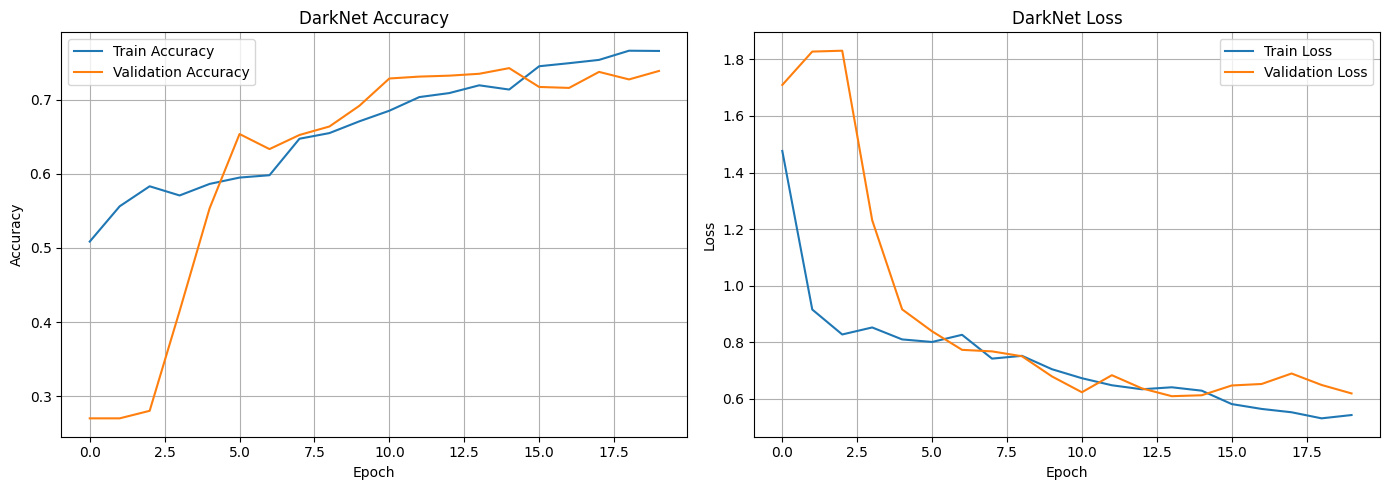

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_darknet.history['accuracy'], label='Train Accuracy')
plt.plot(history_darknet.history['val_accuracy'], label='Validation Accuracy')
plt.title('DarkNet Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_darknet.history['loss'], label='Train Loss')
plt.plot(history_darknet.history['val_loss'], label='Validation Loss')
plt.title('DarkNet Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
darknet_eval_results = darknet_model.evaluate(train_df, verbose=1)
print(f"\nDarkNet Model Evaluation Results:\nLoss: {darknet_eval_results[0]:.4f}, Accuracy: {darknet_eval_results[1]:.4f}, Top-2 Accuracy: {darknet_eval_results[2]:.4f}")

99/99 ━━━━━━━━━━━━━━━━━━━━ 65s 650ms/step - accuracy: 0.7982 - loss: 0.4613 - top_k_accuracy: 0.9307

DarkNet Model Evaluation Results:
Loss: 0.4407, Accuracy: 0.8119, Top-2 Accuracy: 0.9378


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


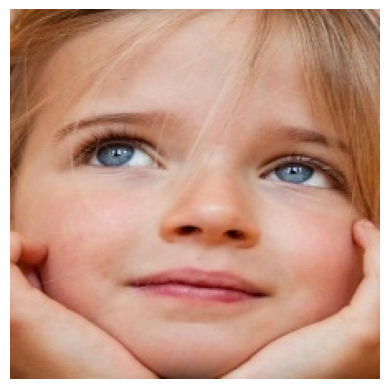

Predicted class: 1


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test/sad/sad_99.jpg'

test_image = cv2.imread(img_path)

if test_image is None:
    print("Image not found or failed to load:", img_path)
else:
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    test_image_resized = cv2.resize(test_image, (CONFIG['IM_SIZE'], CONFIG['IM_SIZE']))
    test_image_resized = test_image_resized.astype('float32') / 255.0
    test_image_resized = np.expand_dims(test_image_resized, axis=0)
    prediction = darknet_model.predict(test_image_resized)
    predicted_class = np.argmax(prediction, axis=1)
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()
    print(f"Predicted class: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


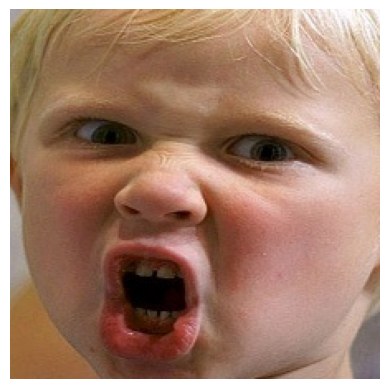

Predicted class: 0


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test/angry/angry_99.jpg'

test_image = cv2.imread(img_path)

if test_image is None:
    print("Image not found or failed to load:", img_path)
else:
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    test_image_resized = cv2.resize(test_image, (CONFIG['IM_SIZE'], CONFIG['IM_SIZE']))
    test_image_resized = test_image_resized.astype('float32') / 255.0
    test_image_resized = np.expand_dims(test_image_resized, axis=0)
    prediction = darknet_model.predict(test_image_resized)
    predicted_class = np.argmax(prediction, axis=1)
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()
    print(f"Predicted class: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


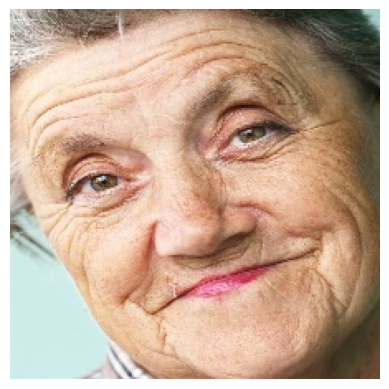

Predicted class: 1


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test/happy/happy_99.jpg'

test_image = cv2.imread(img_path)

if test_image is None:
    print("Image not found or failed to load:", img_path)
else:
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    test_image_resized = cv2.resize(test_image, (CONFIG['IM_SIZE'], CONFIG['IM_SIZE']))
    test_image_resized = test_image_resized.astype('float32') / 255.0
    test_image_resized = np.expand_dims(test_image_resized, axis=0)
    prediction = darknet_model.predict(test_image_resized)
    predicted_class = np.argmax(prediction, axis=1)
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()
    print(f"Predicted class: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


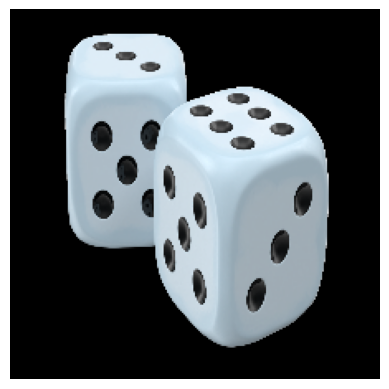

Predicted class: 2


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test/nothing/nothing_99.jpg'

test_image = cv2.imread(img_path)

if test_image is None:
    print("Image not found or failed to load:", img_path)
else:
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    test_image_resized = cv2.resize(test_image, (CONFIG['IM_SIZE'], CONFIG['IM_SIZE']))
    test_image_resized = test_image_resized.astype('float32') / 255.0
    test_image_resized = np.expand_dims(test_image_resized, axis=0)
    prediction = darknet_model.predict(test_image_resized)
    predicted_class = np.argmax(prediction, axis=1)
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()
    print(f"Predicted class: {predicted_class[0]}")


In [ ]:
CONFIG = {
    'IM_SIZE': 128,
    'DROPOUT_RATE': 0.5,
    'NUM_CLASSES': 3,
    'LEARNING_RATE': 0.001,
    'N_EPOCHS': 10,
    'CLASS_NAMES': ['sad', 'happy', 'angry','nothing']
}


Found 788 files belonging to 4 classes.
Darknet Model expects input shape: (128, 128)


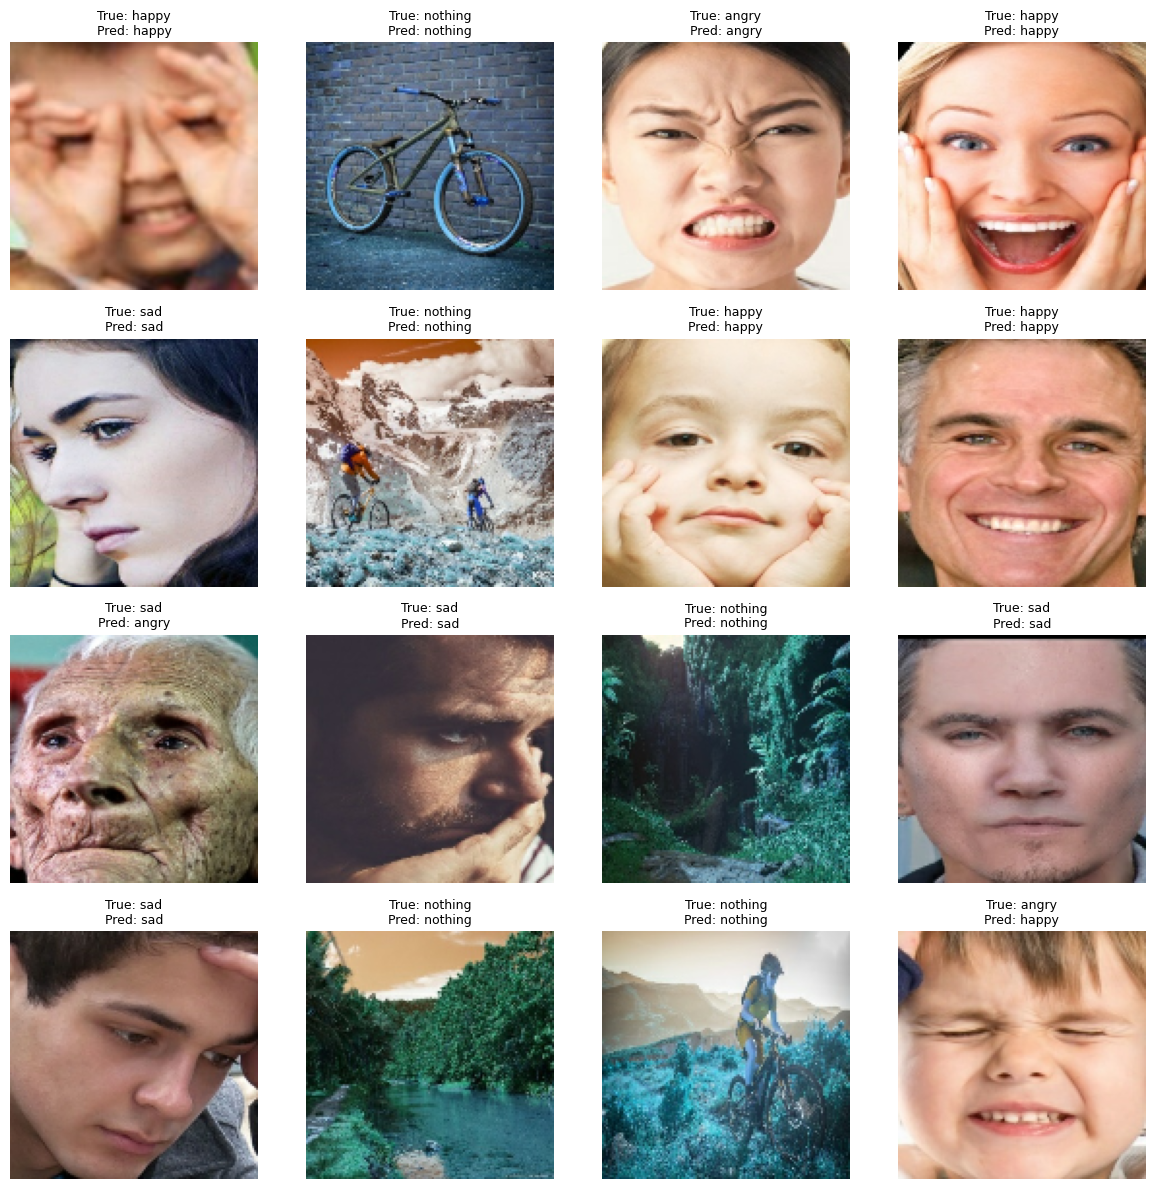

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test',
    image_size=(CONFIG['IM_SIZE'], CONFIG['IM_SIZE']),
    batch_size=32
)

CONFIG['CLASS_NAMES'] = train_dataset.class_names
CNN_INPUT_SIZE = darknet_model.input_shape[1:3]

print("Darknet Model expects input shape:", CNN_INPUT_SIZE)
plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    images = images / 255.0
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)

        img = tf.image.resize(images[i], CNN_INPUT_SIZE)

        img_expanded = tf.expand_dims(img, axis=0)
        preds = cnn_model(img_expanded, training=False)
        pred_label_idx = tf.argmax(preds, axis=1).numpy()[0]
        pred_label = CONFIG["CLASS_NAMES"][pred_label_idx]
        true_label_idx = labels[i].numpy()
        true_label = CONFIG["CLASS_NAMES"][true_label_idx]

        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
        plt.axis("off")

plt.tight_layout()
plt.show()


Found 788 files belonging to 4 classes.


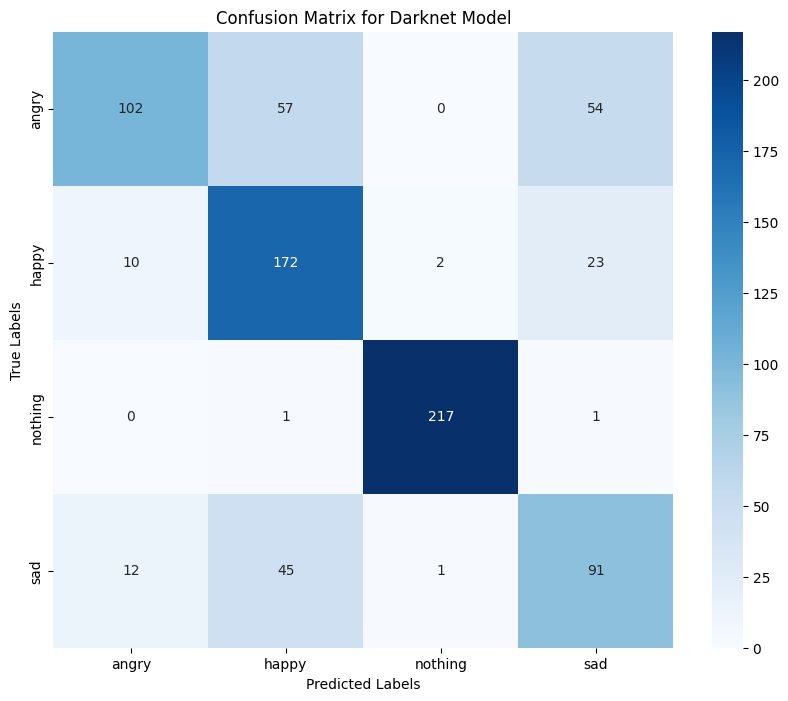

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
test_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/EmotionsDataset_Splitted/data/test',
    image_size=(CONFIG['IM_SIZE'], CONFIG['IM_SIZE']),
    batch_size=32
)

CONFIG['CLASS_NAMES'] = test_dataset.class_names
DARKNET_INPUT_SIZE = darknet_model.input_shape[1:3]

true_labels = []
predicted_labels = []
for images, labels in test_dataset:
    images = images / 255.0
    preds = darknet_model(images, training=False)
    pred_label_idx = tf.argmax(preds, axis=1).numpy()

    true_labels.extend(labels.numpy())
    predicted_labels.extend(pred_label_idx)
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=CONFIG['CLASS_NAMES'],
    yticklabels=CONFIG['CLASS_NAMES']
)
plt.title("Confusion Matrix for Darknet Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
cnn_accuracy = 0.9131
cnn_loss = 0.1984

darknet_accuracy = 0.8119
darknet_loss = 0.4407


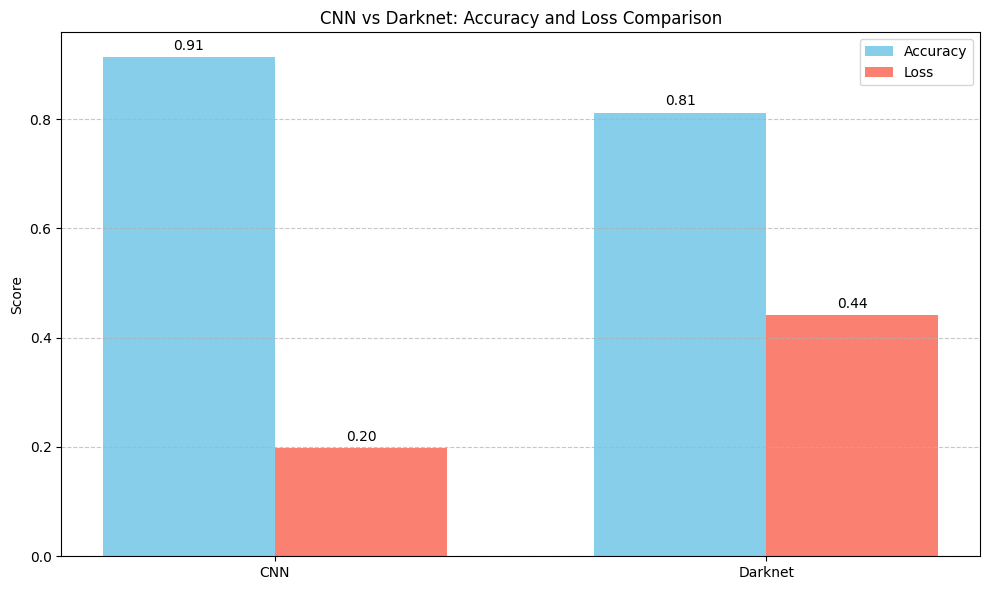

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['CNN', 'Darknet']
accuracy = [cnn_accuracy, darknet_accuracy]
loss = [cnn_loss, darknet_loss]
x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

acc_bars = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
loss_bars = ax.bar(x + width/2, loss, width, label='Loss', color='salmon')

ax.set_ylabel('Score')
ax.set_title('CNN vs Darknet: Accuracy and Loss Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
for bar in acc_bars + loss_bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(images)
y = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
cnn_preds = cnn_model.predict(X_val)
cnn_preds_classes = np.argmax(cnn_preds, axis=1)
darknet_preds = darknet_model.predict(X_val)
darknet_preds_classes = np.argmax(darknet_preds, axis=1)
from sklearn.metrics import classification_report
class_labels = label_encoder.classes_

print("=== CNN Model Classification Report ===")
print(classification_report(y_val, cnn_preds_classes, target_names=class_labels))

print("\n=== Darknet Model Classification Report ===")
print(classification_report(y_val, darknet_preds_classes, target_names=class_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
=== CNN Model Classification Report ===
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00         1
       happy       1.00      1.00      1.00         1
     nothing       1.00      1.00      1.00         1
         sad       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


=== Darknet Model Classification Report ===
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00         1
       happy       0.50      1.00      0.67         1
     nothing       1.00      1.00      1.00         1
         sad       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.62      0.75      0.67         4
weighted avg       0.6

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


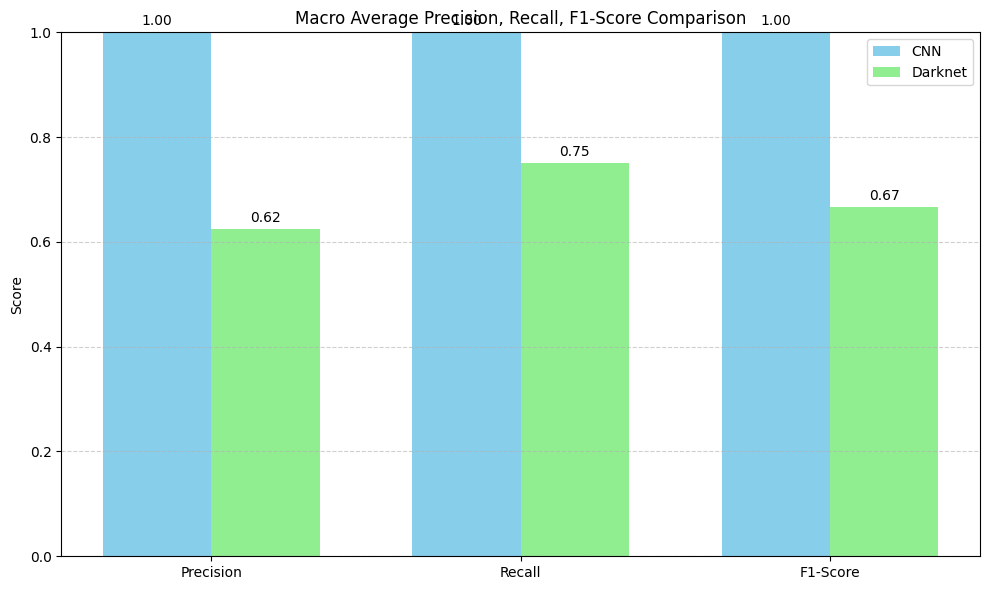

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
cnn_report = classification_report(y_val, cnn_preds_classes, output_dict=True)
darknet_report = classification_report(y_val, darknet_preds_classes, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
cnn_scores = [cnn_report['macro avg'][m] for m in metrics]
darknet_scores = [darknet_report['macro avg'][m] for m in metrics]

labels = ['Precision', 'Recall', 'F1-Score']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, cnn_scores, width, label='CNN', color='skyblue')
bars2 = ax.bar(x + width/2, darknet_scores, width, label='Darknet', color='lightgreen')

ax.set_ylabel('Score')
ax.set_title('Macro Average Precision, Recall, F1-Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 1])
ax.legend()
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
